# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [2]:
df.index = pd.to_datetime(df.index)
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

In [3]:
import seaborn as sns
sns.set_theme(style="whitegrid")

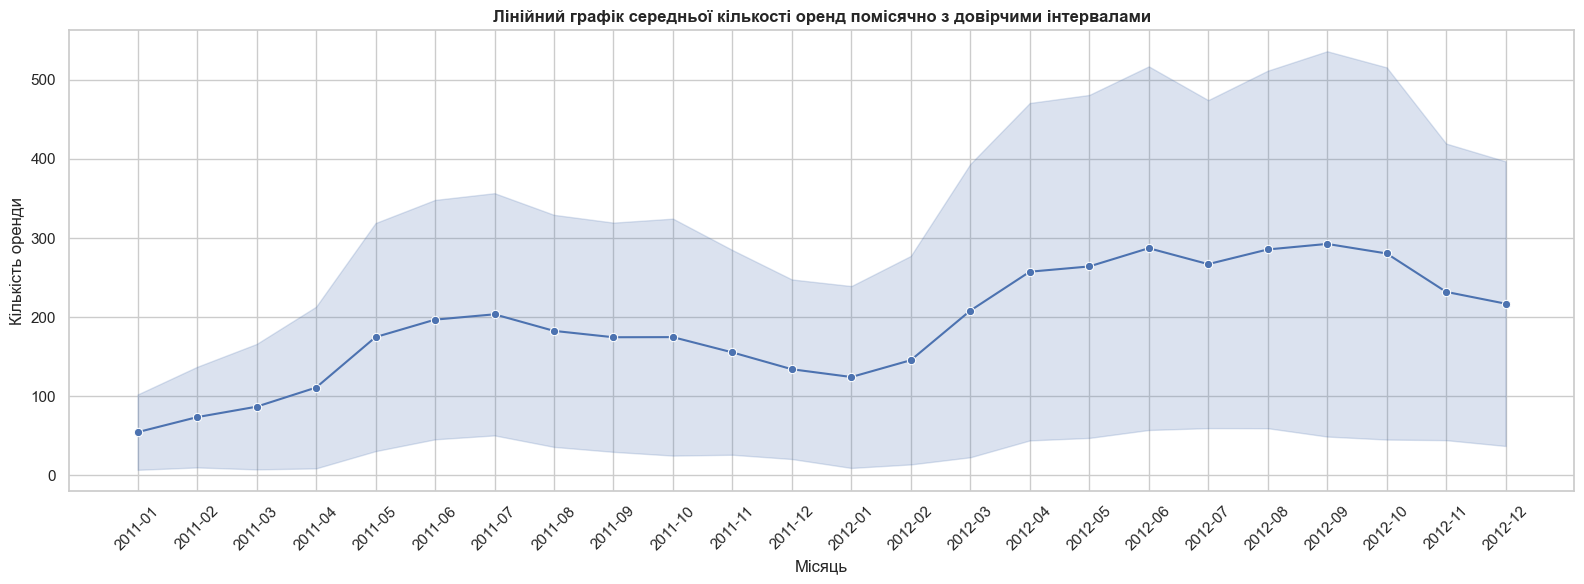

In [4]:
plt.figure(figsize=(16, 6))
sns.lineplot(df, x='month_year', y='count', errorbar='sd', marker='o')
plt.title('Лінійний графік середньої кількості оренд помісячно з довірчими інтервалами', fontweight='bold')
plt.xlabel('Місяць')
plt.ylabel('Кількість оренди')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

В які місяці найбільша невизначеність в даних?
Найбільша невизначеність у даних спостерігається в літні місяці (приблизно з травня по серпень), що видно за ширшими довірчими інтервалами. Це пов’язано з вищою варіативністю попиту на оренду велосипедів у період активного сезону. Також помітно, що у 2012 році розкид значень загалом більший, ніж у 2011 році, що свідчить про зростання коливань попиту.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

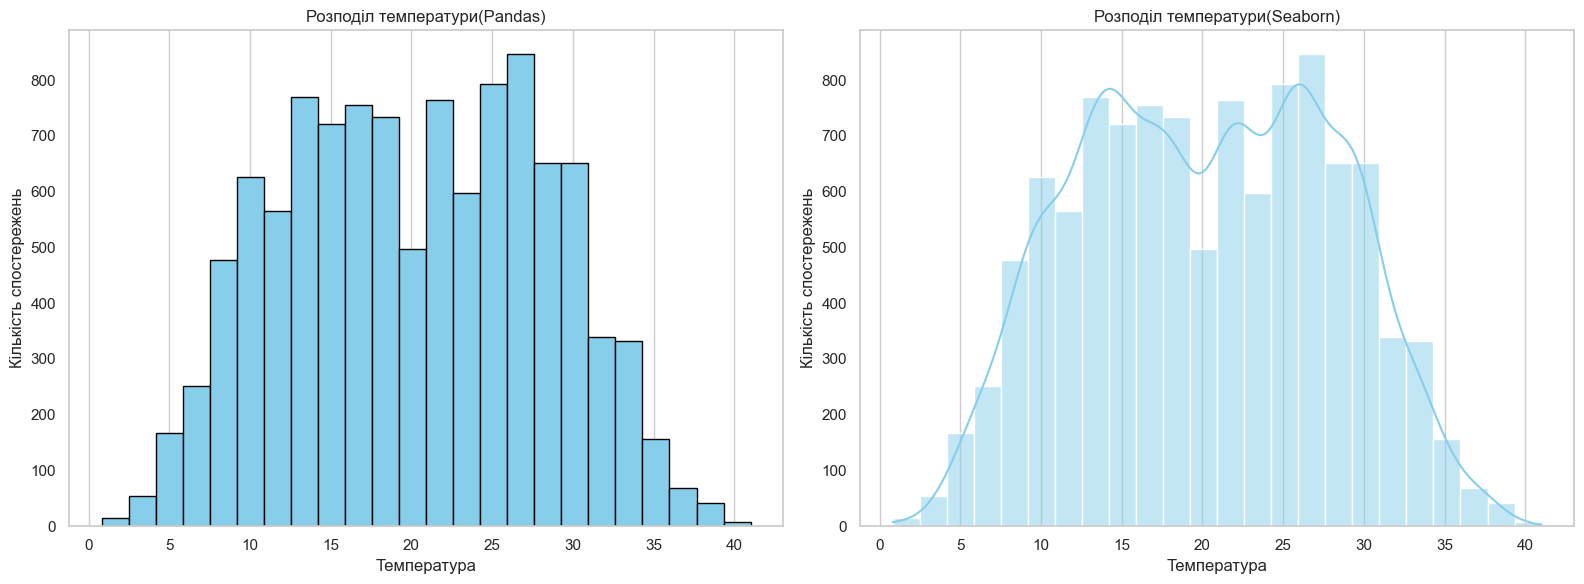

In [5]:
bins=24
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
df['temp'].plot.hist(
    bins=bins,
    color='skyblue',
    edgecolor='black'
)
plt.title('Розподіл температури(Pandas)')
plt.xlabel('Температура')
plt.ylabel('Кількість спостережень')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
sns.histplot(
    df, x='temp',
    bins=bins,
    kde=True,
    color='skyblue'  
)
plt.title('Розподіл температури(Seaborn)')
plt.xlabel('Температура')
plt.ylabel('Кількість спостережень')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
Гістограма Pandas виглядає простіше: вона показує лише стовпчики з кількістю спостережень у кожному інтервалі.
Гістограма Seaborn виглядає більш згладженою та інформативною — вона має сучасніший стиль і візуально приємніша.

2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

Це KDE-крива (Kernel Density Estimation) — оцінка щільності розподілу.

Це згладжена лінія, яка показує де значень найбільше і як вони розподіляються в цілому.
Вона допомагає швидше зрозуміти форму даних, не вдивляючись у кожен стовпчик.


## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

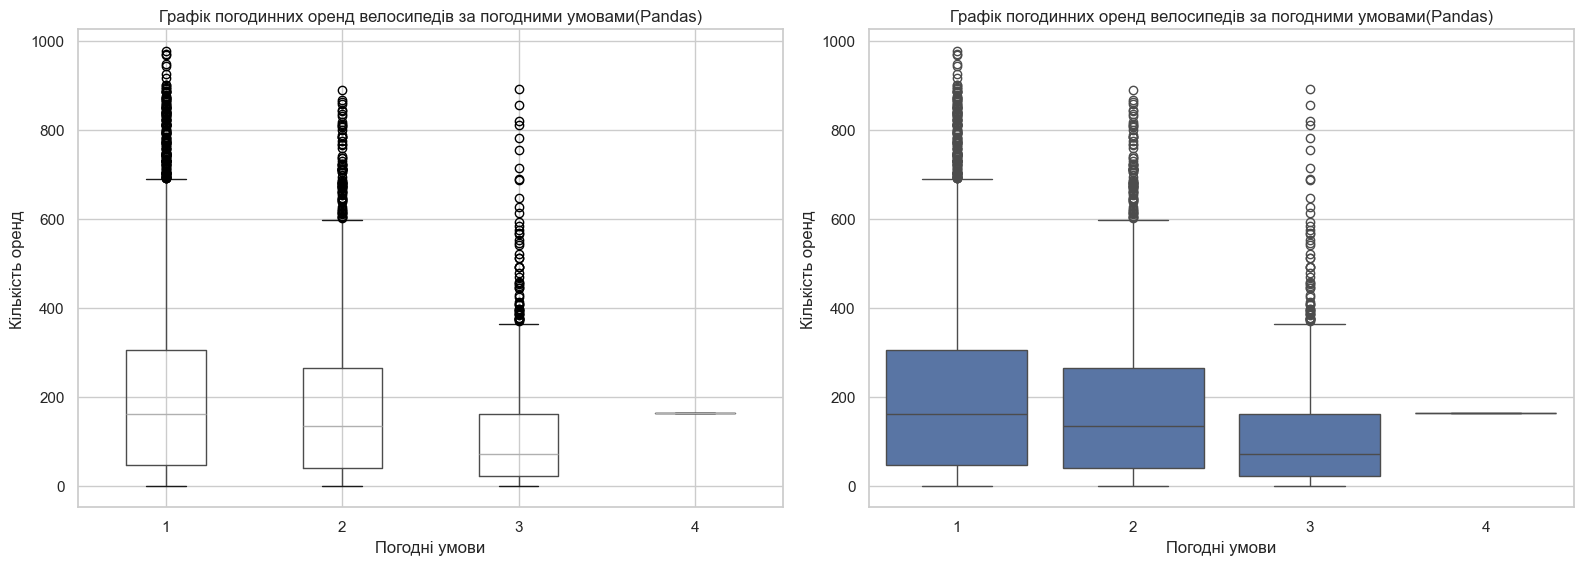

In [6]:
fig, axes = plt.subplots(1, 2,figsize=(16,6))
df.boxplot(
   column='count',
    by='weather',
    ax=axes[0]
)
axes[0].set_title('Графік погодинних оренд велосипедів за погодними умовами(Pandas)')
axes[0].set_xlabel('Погодні умови')
axes[0].set_ylabel('Кількість оренд')

fig.suptitle('')

sns.boxplot(
    df, 
    x='weather',
    y='count',
     ax=axes[1]
)
axes[1].set_title('Графік погодинних оренд велосипедів за погодними умовами(Pandas)')
axes[1].set_xlabel('Погодні умови')
axes[1].set_ylabel('Кількість оренд')

plt.tight_layout()
plt.show();


	•	Яка візуальна різниця між Pandas та Seaborn бокс-плотами?
Pandas boxplot виглядає більш простим: стандартні кольори, тонкі лінії, мінімум стилю. Його зручно використовувати для швидкої перевірки даних, але він не дуже привабливий для презентацій.
Seaborn boxplot виглядає охайніше й сучасніше.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [7]:
df.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour,month_year
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0,2011-01


In [8]:
correlation = df[['count', 'temp', 'atemp', 'humidity', 'windspeed']].corr()

In [9]:
correlation

,count,temp,atemp,humidity,windspeed
count,1.000000,0.394454,0.389784,-0.317371,0.101369
temp,0.394454,1.000000,0.984948,-0.064949,-0.017852
atemp,0.389784,0.984948,1.000000,-0.043536,-0.057473
humidity,-0.317371,-0.064949,-0.043536,1.000000,-0.318607
windspeed,0.101369,-0.017852,-0.057473,-0.318607,1.000000


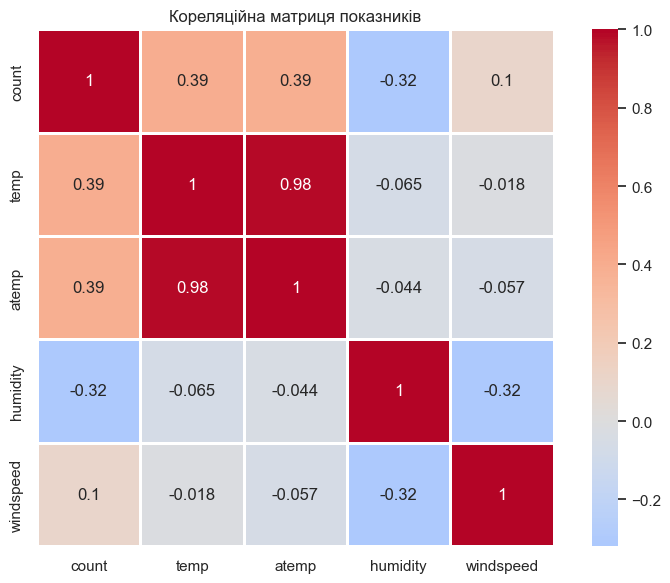

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1
            )

plt.title('Кореляційна матриця показників')
plt.tight_layout()
plt.show()

1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
   Найсильніший позитивний зв’язок із кількістю оренд мають температура повітря (temp) та відчутна температура (atemp) — коли тепліше, велосипеди орендують частіше.
Швидкість вітру має слабшу, але все ж позитивну кореляцію.
Вологість демонструє негативну кореляцію — за більшої вологості кількість оренд зменшується.
2. Яка кореляція між temp та atemp? Чому?
   Кореляція між temp та atemp є дуже сильною та позитивною (близько 0.98).
Це логічно, оскільки atemp розраховується на основі температури повітря з урахуванням додаткових факторів (вологість, вітер), тобто ці показники майже завжди змінюються разом.
3. Які змінні мають негативну кореляцію?
  Негативну кореляцію мають:
температура та вологість (−0.065), температура та швидкість вітру ( −0.018), вологість та швидкість вітру (−0.32)
Із зростанням одного з показників інший має тенденцію зменшуватися і навпаки.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за кварталами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому кварталі найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


In [11]:
df.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour,month_year
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0,2011-01


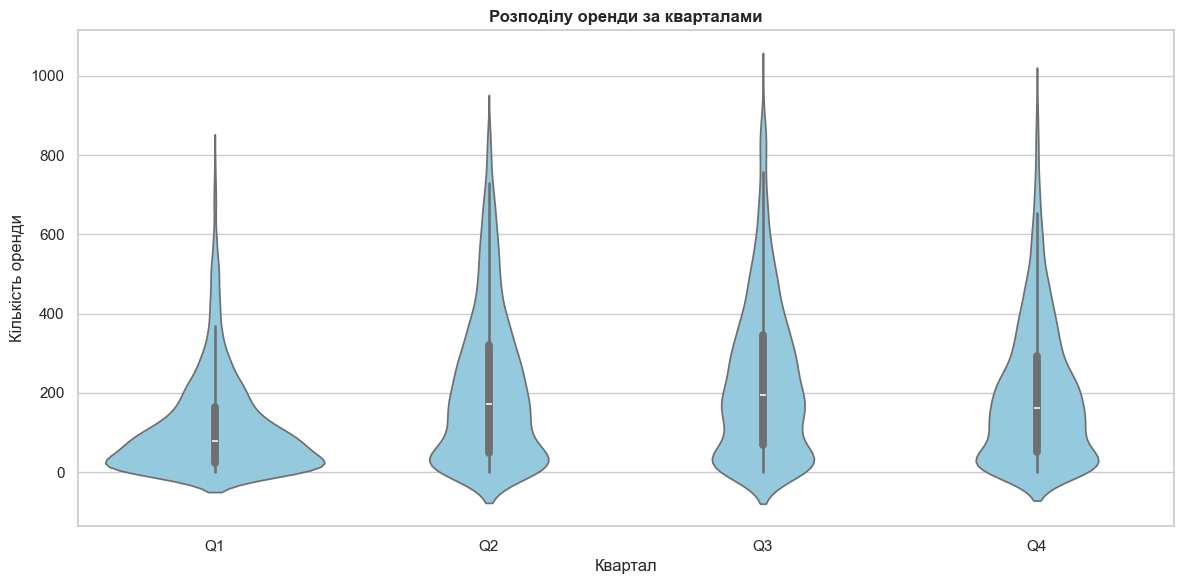

In [12]:
plt.figure(figsize=(12, 6))
sns.violinplot(df, x='season', y='count', color = 'skyblue'
               )
plt.title('Розподілу оренди за кварталами', fontweight='bold')
plt.xlabel('Квартал')
plt.ylabel('Кількість оренди')
plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)
plt.tight_layout()
plt.show()

1. Що показує "товщина" violin plot?
   Товщина показує частоту значень, тобто чим товстіше тим частіше даних значень, тонше - значень менше.
2. В якому кварталі найбільша варіабельність оренди?
   Найбльша варіабельність оренди в другому та третьому кварталах, це не дивно, оскільки в літній період найбільша кількість оренди.
3. Яка перевага violin plot над звичайним box plot?
   Візуальний вигляд та можливсть показати варіативність. Violin plot дає більше інформації про розподіл даних, ніж box plot(середнє значення, медіана, квартилі, викиди), показуючи форму та щільність значень.

## Завдання 6 : Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте season (квартал).

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше відрізняється між кварталами?

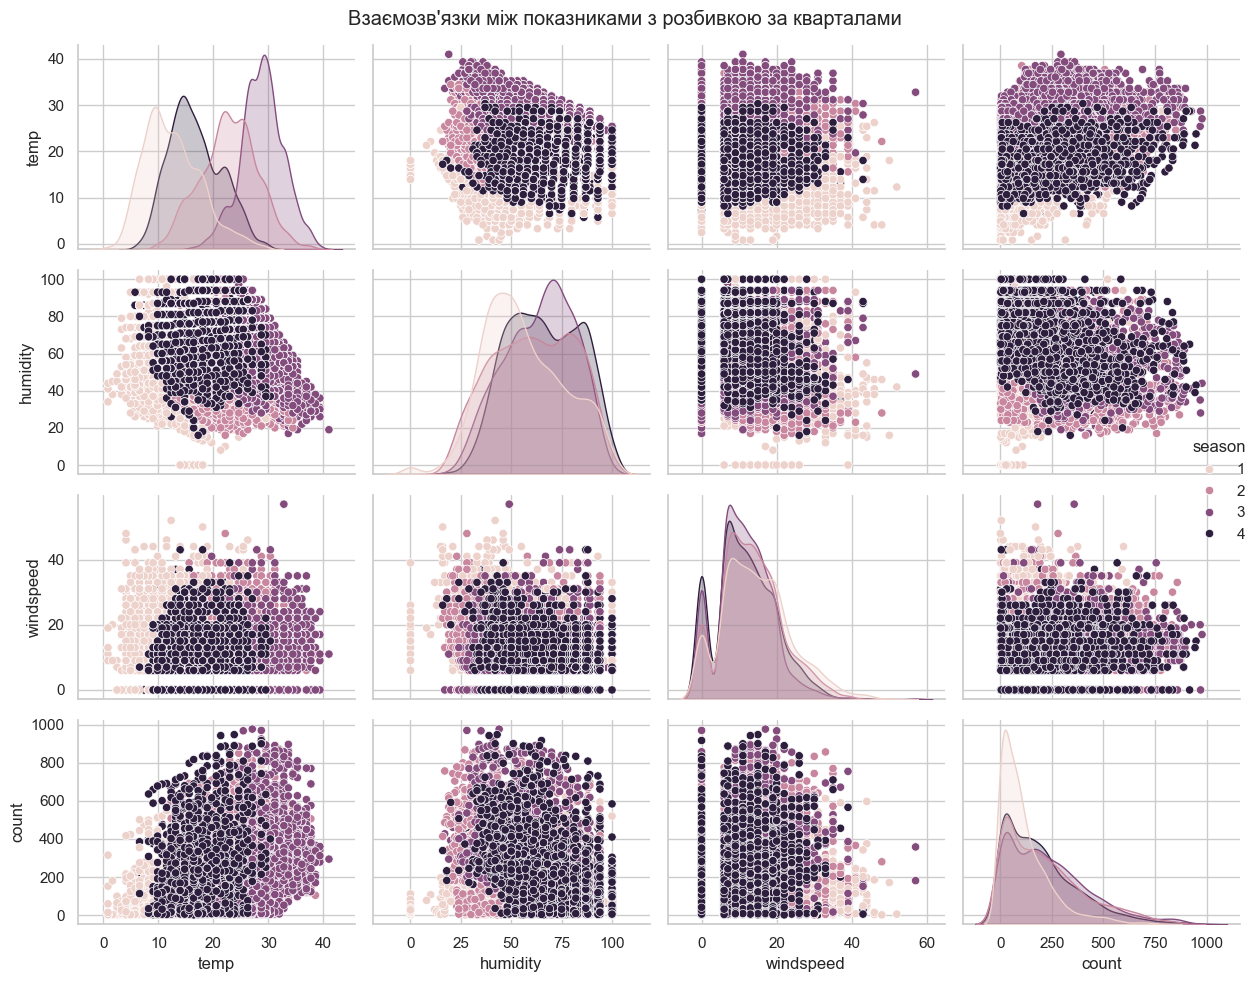

In [13]:
sample_df = df[['temp', 'humidity', 'windspeed', 'count', 'season']]

sns.pairplot(sample_df, hue='season', height=2.5, aspect=1.2)
plt.suptitle("Взаємозв'язки між показниками з розбивкою за кварталами")
plt.tight_layout()
plt.show()

1. Між якими змінними спостерігається найсильніший лінійний зв'язок?

Найбльший лінійний звязок між кількістю оренди(count) та температурою(temp), зі зростанням температури збільшується кількість оренд. 
Прослідковується також негативний лінійний зв'язок між темпертаурою(temp) та вологістю(humidity).

2. Яка характеристика найбільше відрізняється між кварталами?
   
Кількість оренд(сcount) - у теплих кварталах значення значно вищі й розподіли ширші, ніж у холодних.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

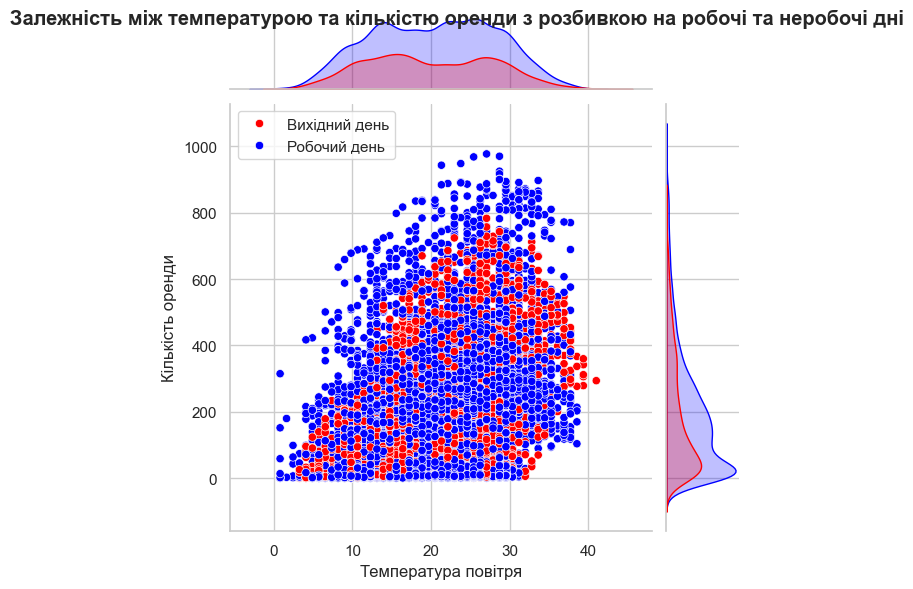

In [14]:
df['workingday_label'] = df['workingday'].map({
    0: 'Вихідний день',
    1: 'Робочий день'
})
g = sns.jointplot(df, x = 'temp', y = 'count', hue = 'workingday_label', palette={'Вихідний день': 'red', 'Робочий день': 'blue'})
plt.suptitle('Залежність між температурою та кількістю оренди з розбивкою на робочі та неробочі дні', fontweight = 'bold')
plt.xlabel('Температура повітря')
plt.ylabel('Кількість оренди')
g.ax_joint.legend_.set_title(None)

plt.show();

1. Що показують графіки по краях?
Зверху варіативність температури за робочими днями, збоку - розподіл кількості оренди також за днями.
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?
   Різниця є, в робочі дні більше оренд, особливо при середніх та вищих температурах, у вихідін дні оренда більш розсіяна, немає тенденції порівняо з робочими днями. Тобто велосипеди більше використовують для поїздок у справах, у вихідні - дозвілля.